In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
## Replace intermediary jurisdiction with officer base
jurisdiction_status_list = ['jurisdiction','officer_base','officer_jurisdiction']

In [5]:
df_weighted_jur = df_weighted[df_weighted['status'].isin(jurisdiction_status_list)]
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
338119,Indonesia,British Virgin Islands
338120,Cook Islands,British Virgin Islands
338121,Hong Kong,British Virgin Islands
338122,Cook Islands,United Kingdom


In [6]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2750,Zimbabwe,Hong Kong,3
2751,Zimbabwe,Jersey,1
2752,Zimbabwe,Panama,3
2753,Zimbabwe,Russia,2


### Convert Data to an Undirected Edge List

In [7]:
df_jur_grouped_list = df_jur_grouped.values.tolist()
df_jur_grouped_list

[['Albania', 'Bahamas', 2],
 ['Algeria', 'British Virgin Islands', 2],
 ['Algeria', 'United Kingdom', 2],
 ['Algeria', 'United States', 1],
 ['Andorra', 'Bahamas', 26],
 ['Andorra', 'British Virgin Islands', 43],
 ['Andorra', 'Cayman Islands', 1],
 ['Andorra', 'Costa Rica', 3],
 ['Andorra', 'Hong Kong', 9],
 ['Andorra', 'Ireland', 1],
 ['Andorra', 'Latvia', 1],
 ['Andorra', 'Nevada', 24],
 ['Andorra', 'Niue', 12],
 ['Andorra', 'Panama', 279],
 ['Andorra', 'Russia', 2],
 ['Andorra', 'Samoa', 9],
 ['Andorra', 'Seychelles', 72],
 ['Andorra', 'United Kingdom', 1],
 ['Andorra', 'Uruguay', 15],
 ['Angola', 'Bermuda', 1],
 ['Angola', 'British Virgin Islands', 12],
 ['Angola', 'China', 1],
 ['Antigua and Barbuda', 'Barbados', 8],
 ['Antigua and Barbuda', 'British Virgin Islands', 11],
 ['Antigua and Barbuda', 'Canada', 1],
 ['Antigua and Barbuda', 'Cayman Islands', 1],
 ['Antigua and Barbuda', 'China', 4],
 ['Antigua and Barbuda', 'Hong Kong', 4],
 ['Antigua and Barbuda', 'Ireland', 3],
 ['Ant

In [8]:
d = collections.defaultdict(int)
for n1, n2, v in df_jur_grouped_list:
    d[min(n1, n2), max(n1, n2)] += v
result = [[k[0], k[1], v] for k, v in d.items()]

In [9]:
df_net = pd.DataFrame(result)
df_net

,0,1,2
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2337,Hong Kong,Zimbabwe,3
2338,Jersey,Zimbabwe,1
2339,Panama,Zimbabwe,3
2340,Russia,Zimbabwe,2


In [10]:
df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
df_net

,node_1,node_2,weight
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2337,Hong Kong,Zimbabwe,3
2338,Jersey,Zimbabwe,1
2339,Panama,Zimbabwe,3
2340,Russia,Zimbabwe,2


In [11]:
#import df_net to csv later

In [12]:

g = ig.Graph.TupleList(df_net.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


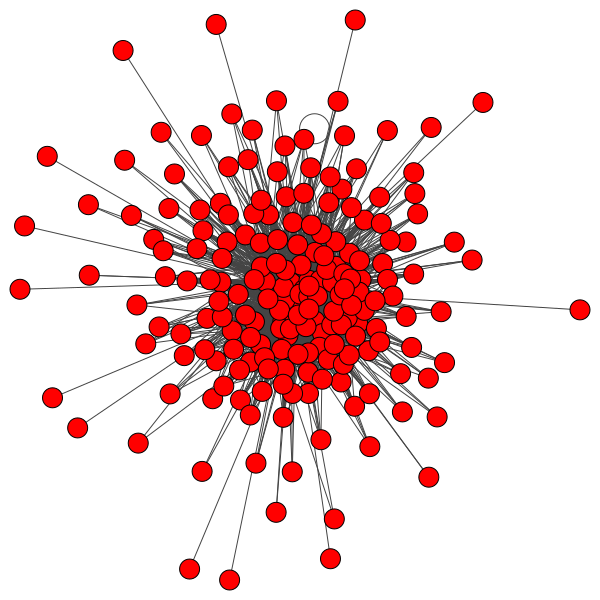

In [13]:
ig.plot(g)

In [14]:
g.diameter()

3

In [15]:
len(g.vs.indices)

195

In [16]:
#g.vs.indices
df_net['node_1'].value_counts()

British Virgin Islands    155
Bahamas                    94
Hong Kong                  89
China                      88
Canada                     78
                         ... 
Albania                     1
Mozambique                  1
Dubai                       1
Benin                       1
Djibouti                    1
Name: node_1, Length: 172, dtype: int64

In [17]:
uni =df_net['node_1'].unique()

In [18]:
len(uni)

172

In [19]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 2, {'name': 'Algeria'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 6, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 8, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 9, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 10, {'name': 'Ireland'}),
 igraph.Vertex(<igraph.Graph object at 0x7fee05335e50>, 11, {'name':

In [20]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
         #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [22]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,88.706186,0.01,3.0,-0.556797,24.041237,0.123288,1.919235
1,2,88.181347,0.01,3.0,-0.556667,24.072539,0.124085,1.918556
2,3,87.635417,0.02,3.0,-0.556691,24.145833,0.125108,1.917648
3,4,87.141361,0.02,3.0,-0.556428,24.136126,0.125709,1.917277
4,5,86.552632,0.03,3.0,-0.556370,24.231579,0.126867,1.915901


In [23]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
190,191,0.0,0.97,0.0,NaN,0.0,0.0,NaN
191,192,0.0,0.98,0.0,NaN,0.0,0.0,NaN
192,193,0.0,0.98,0.0,NaN,0.0,0.0,NaN
193,194,0.0,0.99,0.0,NaN,0.0,0.0,NaN
194,195,0.0,0.99,NaN,NaN,0.0,NaN,NaN


In [24]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,14.0,172.336410,-0.556115,3390.938144,0.122918,1.919716
1,2,0.01,14.0,172.297346,-0.559707,3401.170984,0.121895,1.921146
2,3,0.02,14.0,171.155105,-0.559544,3418.833333,0.122949,1.916667
3,4,0.02,14.0,170.377057,-0.560856,3432.680628,0.122546,1.917443
4,5,0.03,14.0,169.681746,-0.560661,3450.684211,0.123560,1.916291


In [25]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
180,181,0.92,12.0,13.000000,-0.713141,2296.428571,0.257143,1.653846
181,182,0.93,12.0,12.230769,-0.694309,2472.461538,0.274725,1.621212
182,183,0.93,19.0,7.000000,-0.707967,2585.500000,0.269231,1.618182
183,184,0.94,19.0,7.636364,-0.707967,2820.545455,0.318182,1.618182
184,185,0.94,67.0,6.300000,-0.714286,3094.800000,0.327273,1.600000
185,186,0.95,149.0,4.222222,-0.786802,2951.111111,0.244444,1.694444
186,187,0.95,149.0,3.625000,-0.777778,3319.250000,0.277778,1.642857
187,188,0.96,149.0,3.000000,-0.758621,3792.285714,0.321429,1.571429
188,189,0.96,101.0,2.166667,-0.833333,3910.666667,0.285714,1.600000
189,190,0.97,11713.0,1.200000,-1.000000,4686.400000,0.266667,1.600000


### Targeted attack

In [26]:
##try sort by transitivity 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'transitivity':g.transitivity_local_undirected(mode='zero',weights='weight')})

In [27]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='transitivity',ascending=False)

In [28]:
temp_df.head(50)

,Node_indice,Nodes,transitivity
166,166,Saint Lucia,1.353383
81,81,US Virgin Islands,1.048084
97,97,Dominica,1.000000
115,115,Honduras,1.000000
108,108,Ghana,1.000000
110,110,Guam,1.000000
112,112,Guinea,1.000000
113,113,Guyana,1.000000
114,114,Haiti,1.000000
121,121,Iceland,1.000000


In [29]:
temp_df.tail(50)

,Node_indice,Nodes,transitivity
134,134,Lithuania,0.934659
120,120,Hungary,0.923611
135,135,Macao,0.922584
43,43,Netherlands,0.916678
67,67,Brazil,0.916007
99,99,Ecuador,0.915430
35,35,Belize,0.915028
59,59,Liberia,0.913299
70,70,Israel,0.910441
48,48,United Arab Emirates,0.906200


In [30]:
#extract out by Node
transitivity_of_del = temp_df['Nodes'].tolist()

In [31]:
#print the list to check it
transitivity_of_del

['Saint Lucia',
 'US Virgin Islands',
 'Dominica',
 'Honduras',
 'Ghana',
 'Guam',
 'Guinea',
 'Guyana',
 'Haiti',
 'Iceland',
 'French Polynesia',
 'Iran',
 'Jamaica',
 'Kyrgyzstan',
 'Laos',
 'Lesotho',
 'Gabon',
 'Finland',
 'French Guiana',
 'Macedonia',
 'Fiji',
 'Egypt',
 'Djibouti',
 'Cuba',
 'Congo',
 'Labuan',
 'Georgia',
 'Chad',
 'Saint Vincent and the Grenadines',
 'Marshall Islands',
 'Cambodia',
 'Bulgaria',
 'Libya',
 'Madagascar',
 'State of Delaware',
 'Malawi',
 'Uzbekistan',
 'Turkmenistan',
 'Tunisia',
 'Trinidad and Tobago',
 'Tanzania',
 'Tajikistan',
 'Syria',
 'Suriname',
 'Sri Lanka',
 'Slovenia',
 'Slovakia',
 'Sierra Leone',
 'Senegal',
 'Qatar',
 'Puerto Rico',
 'Papua New Guinea',
 'Palestine',
 'Oman',
 'Norway',
 'Nigeria',
 'Nicaragua',
 'Nepal',
 'Nauru',
 'Namibia',
 'Mozambique',
 'Morocco',
 'Montenegro',
 'Mongolia',
 'Moldova',
 'Brunei',
 'Zimbabwe',
 'Bangladesh',
 'Bhutan',
 'Bahrain',
 'Netherlands Antilles',
 'Armenia',
 'Azerbaijan',
 'Algeri

In [32]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [34]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,Saint Lucia,88.664948,3.0,-0.558342,24.082474,0.123500,1.918808
1,2,0.01,US Virgin Islands,88.279793,3.0,-0.559874,23.886010,0.123124,1.919581
2,3,0.02,Dominica,87.739583,3.0,-0.560573,23.947917,0.124082,1.918739
3,4,0.02,Honduras,87.188482,3.0,-0.560400,24.031414,0.125164,1.917773
4,5,0.03,Ghana,86.631579,3.0,-0.560078,24.094737,0.126150,1.916736


In [35]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
190,191,0.97,Mali,0.0,0.0,NaN,0.0,0.0,NaN
191,192,0.98,Norfolk Island,0.0,0.0,NaN,0.0,0.0,NaN
192,193,0.98,Yemen,0.0,0.0,NaN,0.0,0.0,NaN
193,194,0.99,Zambia,0.0,0.0,NaN,0.0,0.0,NaN
194,195,0.99,Albania,0.0,NaN,NaN,0.0,NaN,NaN


In [36]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Saint Lucia,171.982060,14.0,-0.558342,3391.175258,0.123500,1.918808
1,2,0.01,US Virgin Islands,171.241617,14.0,-0.559874,3397.709845,0.123124,1.919581
2,3,0.02,Dominica,170.292088,14.0,-0.560573,3414.656250,0.124082,1.918739
3,4,0.02,Honduras,168.957804,14.0,-0.560400,3432.272251,0.125164,1.917773
4,5,0.03,Ghana,168.111711,14.0,-0.560078,3450.252632,0.126150,1.916736
5,6,0.03,Guam,166.949662,14.0,-0.560090,3468.486772,0.127374,1.915231
6,7,0.04,Guinea,165.739288,14.0,-0.560175,3486.914894,0.128616,1.911708
7,8,0.04,Guyana,164.687714,14.0,-0.560126,3505.518717,0.129821,1.910298
8,9,0.05,Haiti,162.886094,14.0,-0.560751,3524.279570,0.131102,1.908689
9,10,0.05,Iceland,162.014066,14.0,-0.560942,3543.113514,0.132229,1.907638


In [37]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
45,46,0.23,Slovenia,127.312457,16.0,-0.535330,4378.026846,0.182103,1.855433
46,47,0.24,Slovakia,126.522786,16.0,-0.533880,4407.310811,0.183838,1.853650
47,48,0.24,Sierra Leone,125.503951,16.0,-0.532791,4437.183673,0.185880,1.851645
48,49,0.25,Senegal,124.148766,16.0,-0.532218,4467.534247,0.188240,1.848087
49,50,0.26,Qatar,123.032822,16.0,-0.531190,4497.875862,0.190175,1.846360
...,...,...,...,...,...,...,...,...,...
190,191,0.97,Mali,0.000000,0.0,NaN,0.000000,0.000000,NaN
191,192,0.98,Norfolk Island,0.000000,0.0,NaN,0.000000,0.000000,NaN
192,193,0.98,Yemen,0.000000,0.0,NaN,0.000000,0.000000,NaN
193,194,0.99,Zambia,0.000000,0.0,NaN,0.000000,0.000000,NaN


#### Unweighted

In [38]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted
#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 100)
#ax[0].set_ylim([0,12])
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

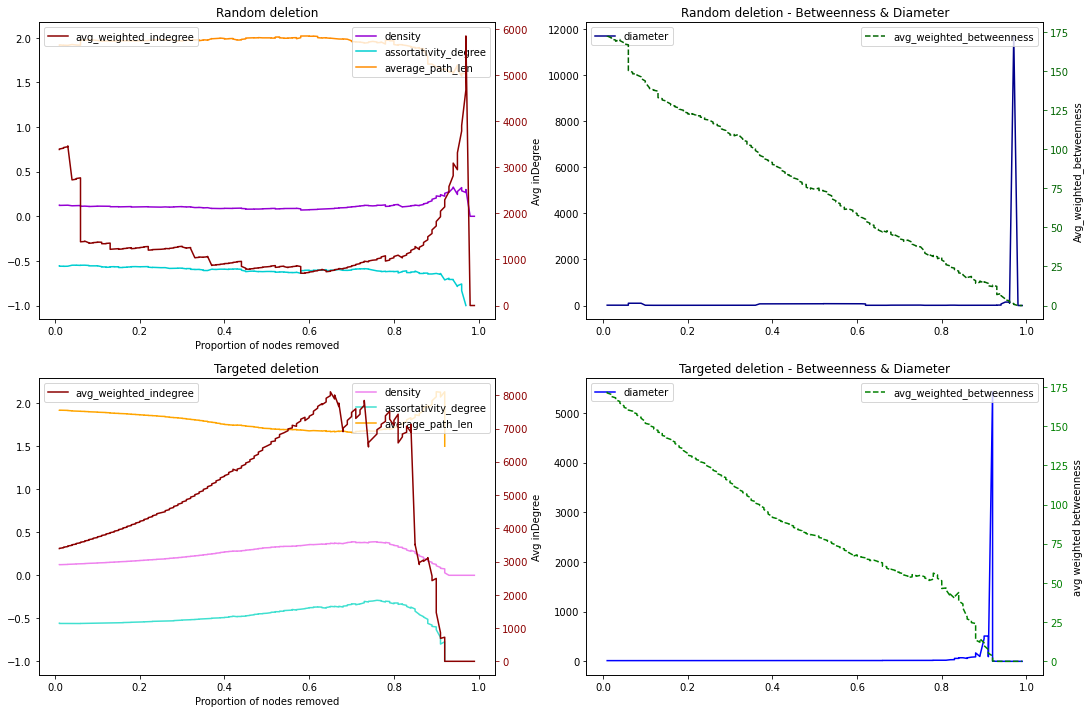

In [39]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax[0,0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[1,0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()